In [1]:
import pandas, numpy, matplotlib.pyplot as plt, scipy.optimize, scipy.interpolate
data = pandas.read_excel('Initialisaion_raw.xlsx', na_values='nan')
data.head()

,Bottle,C_nom,V_ads,C_ads,C_AAi,df_i,C_i,C_AAf,df_f,C_f,Delta_C,Removal,Q
0,1,50,0.2,0.002796,5.899,10,58.99,2.760,10,27.600,31.390,0.532124,11226.752504
1,2,50,1.0,0.013980,4.068,10,40.68,1.638,10,16.380,24.300,0.597345,1738.197425
2,3,50,1.8,0.025164,0.997,10,9.97,3.026,3,9.078,0.892,0.089468,35.447465
3,4,50,2.6,0.036348,3.605,10,36.05,6.549,3,19.647,16.403,0.455007,451.276549
4,5,50,3.4,0.047532,3.042,10,30.42,6.531,3,19.593,10.827,0.355917,227.783388


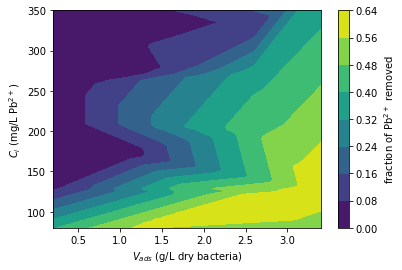

<Figure size 432x288 with 0 Axes>

In [4]:
# data = data.drop(0)
y = data['C_i'].values.flatten()
x = data['V_ads'].values.flatten()
z =  data['Removal'].replace(numpy.nan, 0).values.flatten()
# z = data['Q'].values.flatten()
X = numpy.linspace(x.min(), x.max(), 100)
Y = numpy.linspace(y.min(), y.max(), 100)
X,Y = numpy.meshgrid(X,Y)
Z = scipy.interpolate.griddata((x, y), z, (X,Y), method='linear')

fig = plt.figure()
contour = plt.contourf(X, Y, Z, cmap='viridis')
# labels = plt.clabel(contour, inline=2, fontsize=10)
cbar = plt.colorbar()
cbar.ax.set_ylabel('fraction of Pb$^{2+}$ removed')
plt.ylim(80,350)
plt.ylabel('$C_i$ (mg/L Pb$^{2+}$)')
plt.xlabel('$V_{ads}$ (g/L dry bacteria)')
# plt.plot(x, y,'o')
plt.show()
plt.draw()
# fig.savefig('adsorption matrix.pdf')
fig.savefig('adsorption-matrix-icheap.png')

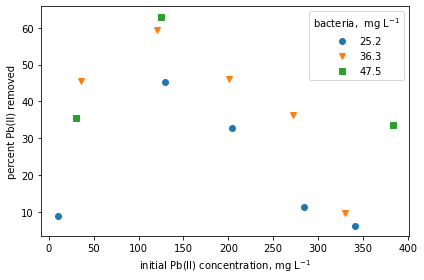

<Figure size 432x288 with 0 Axes>

In [8]:
zs = ['Removal', 'Q']
z = zs[0]
ylable = {'Removal':'fraction Pb(II) removed', 'Q':'$q_e$ (mg/g)'}
xlable = {'Removal':'$C_i$ (mg/L)', 'Q':'$C_e$ (mg/L)'}
cols = {'Removal':0, 'Q':1}
formats = {'Removal':'o', 'Q':'o'}
format_diff = ['o','v', 's']
x_axes = {'Removal':'C_i', 'Q':'C_f'}

fig = plt.figure()

group_Vads = data.groupby('V_ads')
V_adss = list(group_Vads.groups.keys())
V_adss.remove(0.2)
V_adss.remove(1.0)

group_Cads = data.groupby('C_ads')
C_adss = numpy.array(list(group_Cads.groups.keys()))
C_adss = numpy.round(C_adss*1000, decimals=1)
C_adss = numpy.delete(C_adss, [0,1], 0)
legend_lable = dict(zip(V_adss, C_adss)) 

data = pandas.read_excel('Initialisaion_raw.xlsx', na_values='nan').drop(0)
data


# def langmuir(Ce, qmax, Kl):
#     return qmax*Kl*Ce/(1 + Kl*Ce)

# data_curve_fit = data[data['Q'].notna()]
# Qs = data_curve_fit.Q.values.flatten()
# Ces = data_curve_fit.C_f.values.flatten()
# parms, _ = scipy.optimize.curve_fit(langmuir, Ces, Qs, [2500, 100])
# qmax, Kl = parms
# cont_Ces = numpy.linspace(0, Ces.max(), 100)

i=0
for V_ads in V_adss:
    data_cnom = data.loc[data['V_ads'] == V_ads]
    plt.plot(data_cnom[x_axes[z]], data_cnom[z]*100,format_diff[i], linewidth=0.7, label=str(legend_lable[V_ads]))
    i += 1
# plt.plot(80, 61.7,'ko')

plt.legend(title='bacteria,  mg L$^{-1}$')
plt.ylabel('percent Pb(II) removed')
plt.xlabel('initial Pb(II) concentration, mg L$^{-1}$')

# plt.annotate('(a)', (0.2, 0.9), fontsize=20)
# plt.annotate('(b)', (0.76, 0.9), fontsize=20)
plt.tight_layout()
plt.show()
plt.draw()

filename='conc-vs-rem-icheap.png'
fig.savefig(filename, bbox_inches='tight',dpi=600)